<a id="section-one"></a>
## 1 Import Libraries and download data

<a id="define-device"></a>
### 1.2 Define device

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#OE 2 unbalanced labels

In [158]:
import pandas as pd
import numpy as np
import random
np.random.seed(2021)



Final_Data_S1 = pd.read_csv("/content/drive/MyDrive/Final_Data_S1.csv")
Final_Data_S2 = pd.read_csv("/content/drive/MyDrive/Final_Data_S2.csv")

Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([3.0, 4.0])].index,'labels']=1
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin([3.0, 4.0])].index,'labels']=1

!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([0.0])].index,'labels']=0
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([1.0])].index,'labels']=1
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([2.0])].index,'labels']=1

Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin([0.0])].index,'labels']=0
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin([1.0])].index,'labels']=1
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin([2.0])].index,'labels']=1

labels_S1 = Final_Data_S1.labels
labels_S2 = Final_Data_S2.labels
Data_S1 = Final_Data_S1.drop(['time', 'labels'], axis= 1)
Data_S2 = Final_Data_S2.drop(['time', 'labels'], axis= 1)
Data_S3 = Final_Data_S1.drop(['time'], axis= 1)

from sklearn.decomposition import PCA
pca = PCA(n_components=9)
principalComponents_S1 = pca.fit_transform(Data_S1)
pca = PCA(n_components=9)
principalComponents_S2 = pca.fit_transform(Data_S2)

sm = SMOTE(random_state=2)
principalComponents_S1, labels_S1 = sm.fit_resample(principalComponents_S1, labels_S1)
principalComponents_S2, labels_S2 = sm.fit_resample(principalComponents_S2, labels_S2)

Final_Data_S1 = pd.DataFrame(principalComponents_S1)
Final_Data_S2 = pd.DataFrame(principalComponents_S2)

Final_Data_S1['labels'] = labels_S1
Final_Data_S2['labels'] = labels_S2


Data_0 = Final_Data_S1[Final_Data_S1.labels == 0].iloc[:1045]
Data_2 = Final_Data_S1[Final_Data_S1.labels == 1].iloc[:300]
frames = [Data_0, Data_2]
Final_Data_S1 = pd.concat(frames)

Data_0 = Data_S3[Data_S3.labels == 0].iloc[:1045]
Data_2 = Data_S3[Data_S3.labels == 1].iloc[:300]

frames = [Data_0, Data_2]
Data_S3 = pd.concat(frames)

Data_0 = Final_Data_S2[Final_Data_S2.labels == 0].iloc[:772]
Data_2 = Final_Data_S2[Final_Data_S2.labels == 1].iloc[:200]
frames = [Data_0, Data_2]
Final_Data_S2 = pd.concat(frames)

Final_Data_S1 = Final_Data_S1.sample(frac = 1)
Final_Data_S2 = Final_Data_S2.sample(frac = 1)
Data_S3 = Data_S3.sample(frac = 1)

Source_train_1 = Final_Data_S1.iloc[500:,:]
Source_test_1 = Final_Data_S1.iloc[:500,:]

Source_train_2 = Data_S3.iloc[500: ,[0,1,2,4,5,6,8,9,10,13]]
Source_test_2 = Data_S3.iloc[:500,[0,1,2,4,5,6,8,9,10,13]]

Target_train = Final_Data_S2.iloc[500:,:]
Target_test = Final_Data_S2.iloc[:500,:]




Source_train_1.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_train_1.csv', index=False)
Source_test_1.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_test_1.csv', index=False)

Source_train_2.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_train_2.csv', index=False)
Source_test_2.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_test_2.csv', index=False)


Target_train.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Target_train.csv', index=False)
Target_test.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Target_test.csv', index=False)

#OE 3 unbalanced labels

In [356]:
import pandas as pd
import numpy as np
import random
np.random.seed(2021)

Final_Data_S1 = pd.read_csv("/content/drive/MyDrive/Final_Data_S1.csv")
Final_Data_S2 = pd.read_csv("/content/drive/MyDrive/Final_Data_S2.csv")

Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([3.0, 4.0])].index,'labels']=2
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin([3.0, 4.0])].index,'labels']=2

!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([0.0])].index,'labels']=0
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([1.0])].index,'labels']=1
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([2.0])].index,'labels']=2

Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin([0.0])].index,'labels']=0
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin([1.0])].index,'labels']=1
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin([2.0])].index,'labels']=2

labels_S1 = Final_Data_S1.labels
labels_S2 = Final_Data_S2.labels
Data_S1 = Final_Data_S1.drop(['time', 'labels'], axis= 1)
Data_S2 = Final_Data_S2.drop(['time', 'labels'], axis= 1)
Data_S3 = Final_Data_S1.drop(['time'], axis= 1)

from sklearn.decomposition import PCA
pca = PCA(n_components=9)
principalComponents_S1 = pca.fit_transform(Data_S1)
pca = PCA(n_components=9)
principalComponents_S2 = pca.fit_transform(Data_S2)

sm = SMOTE(random_state=2)
principalComponents_S1, labels_S1 = sm.fit_resample(principalComponents_S1, labels_S1)
principalComponents_S2, labels_S2 = sm.fit_resample(principalComponents_S2, labels_S2)

Final_Data_S1 = pd.DataFrame(principalComponents_S1)
Final_Data_S2 = pd.DataFrame(principalComponents_S2)

Final_Data_S1['labels'] = labels_S1
Final_Data_S2['labels'] = labels_S2


Data_0 = Final_Data_S1[Final_Data_S1.labels == 0].iloc[:1045]
Data_2 = Final_Data_S1[Final_Data_S1.labels == 1].iloc[:300]
Data_3 = Final_Data_S1[Final_Data_S1.labels == 2].iloc[:300]
frames = [Data_0, Data_2, Data_3]
Final_Data_S1 = pd.concat(frames)

Data_0 = Data_S3[Data_S3.labels == 0].iloc[:1045]
Data_2 = Data_S3[Data_S3.labels == 1].iloc[:300]
Data_3 = Data_S3[Data_S3.labels == 2].iloc[:300]
frames = [Data_0, Data_2, Data_3]
Data_S3 = pd.concat(frames)

Data_0 = Final_Data_S2[Final_Data_S2.labels == 0].iloc[:772]
Data_2 = Final_Data_S2[Final_Data_S2.labels == 1].iloc[:200]
Data_3 = Final_Data_S2[Final_Data_S2.labels == 2].iloc[:200]
frames = [Data_0, Data_2, Data_3]
Final_Data_S2 = pd.concat(frames)

Final_Data_S1 = Final_Data_S1.sample(frac = 1)
Final_Data_S2 = Final_Data_S2.sample(frac = 1)
Data_S3 = Data_S3.sample(frac = 1)

Source_train_1 = Final_Data_S1.iloc[500:,:]
Source_test_1 = Final_Data_S1.iloc[:500,:]

Source_train_2 = Data_S3.iloc[500: ,[0,1,2,4,5,6,8,9,10,13]]
Source_test_2 = Data_S3.iloc[:500,[0,1,2,4,5,6,8,9,10,13]]

Target_train = Final_Data_S2.iloc[500:,:]
Target_test = Final_Data_S2.iloc[:500,:]




Source_train_1.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_train_1.csv', index=False)
Source_test_1.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_test_1.csv', index=False)

Source_train_2.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_train_2.csv', index=False)
Source_test_2.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_test_2.csv', index=False)


Target_train.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Target_train.csv', index=False)
Target_test.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Target_test.csv', index=False)

#OE balanced 2 labels

In [3]:
import pandas as pd
import numpy as np
import random
np.random.seed(2021)


Final_Data_S1 = pd.read_csv("/content/drive/MyDrive/Final_Data_S1.csv")
Final_Data_S2 = pd.read_csv("/content/drive/MyDrive/Final_Data_S2.csv")

Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([3.0, 4.0])].index,'labels']=1
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin([3.0, 4.0])].index,'labels']=1

!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([0.0])].index,'labels']=0
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([1.0])].index,'labels']=1
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([2.0])].index,'labels']=1

Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin([0.0])].index,'labels']=0
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin([1.0])].index,'labels']=1
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin([2.0])].index,'labels']=1

labels_S1 = Final_Data_S1.labels
labels_S2 = Final_Data_S2.labels
Data_S1 = Final_Data_S1.drop(['time', 'labels'], axis= 1)
Data_S2 = Final_Data_S2.drop(['time', 'labels'], axis= 1)

Data_S3 = Final_Data_S1.drop(['time'], axis= 1)

from sklearn.decomposition import PCA
pca = PCA(n_components=9)
principalComponents_S1 = pca.fit_transform(Data_S1)
pca = PCA(n_components=9)
principalComponents_S2 = pca.fit_transform(Data_S2)

sm = SMOTE(random_state=2)
principalComponents_S1, labels_S1 = sm.fit_resample(principalComponents_S1, labels_S1)
principalComponents_S2, labels_S2 = sm.fit_resample(principalComponents_S2, labels_S2)

Final_Data_S1 = pd.DataFrame(principalComponents_S1)
Final_Data_S2 = pd.DataFrame(principalComponents_S2)

Final_Data_S1['labels'] = labels_S1
Final_Data_S2['labels'] = labels_S2
Final_Data_S1 = Final_Data_S1.sample(frac = 1)
Final_Data_S2 = Final_Data_S2.sample(frac = 1)
Data_S3 = Data_S3.sample(frac = 1)

Source_train_1 = Final_Data_S1.iloc[500:,:]
Source_test_1 = Final_Data_S1.iloc[:500,:]

Source_train_2 = Data_S3.iloc[500: ,[0,1,2,4,5,6,8,9,10,13]]
Source_test_2 = Data_S3.iloc[:500,[0,1,2,4,5,6,8,9,10,13]]

Target_train = Final_Data_S2.iloc[500:,:]
Target_test = Final_Data_S2.iloc[:500,:]


Source_train_1.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_train_1.csv', index=False)
Source_test_1.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_test_1.csv', index=False)

Source_train_2.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_train_2.csv', index=False)
Source_test_2.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_test_2.csv', index=False)


Target_train.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Target_train.csv', index=False)
Target_test.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Target_test.csv', index=False)

#OE 3 labels balanced

In [210]:
import pandas as pd
import numpy as np
import random
np.random.seed(2021)


Final_Data_S1 = pd.read_csv("/content/drive/MyDrive/Final_Data_S1.csv")
Final_Data_S2 = pd.read_csv("/content/drive/MyDrive/Final_Data_S2.csv")


Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([3.0, 4.0])].index,'labels']=2
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin([3.0, 4.0])].index,'labels']=2

!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([0.0])].index,'labels']=0
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([1.0])].index,'labels']=1
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([2.0])].index,'labels']=2

Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin([0.0])].index,'labels']=0
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin([1.0])].index,'labels']=1
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin([2.0])].index,'labels']=2

labels_S1 = Final_Data_S1.labels
labels_S2 = Final_Data_S2.labels
Data_S1 = Final_Data_S1.drop(['time', 'labels'], axis= 1)
Data_S2 = Final_Data_S2.drop(['time', 'labels'], axis= 1)

Data_S3 = Final_Data_S1.drop(['time'], axis= 1)

from sklearn.decomposition import PCA
pca = PCA(n_components=9)
principalComponents_S1 = pca.fit_transform(Data_S1)
pca = PCA(n_components=9)
principalComponents_S2 = pca.fit_transform(Data_S2)

sm = SMOTE(random_state=2)
principalComponents_S1, labels_S1 = sm.fit_resample(principalComponents_S1, labels_S1)
principalComponents_S2, labels_S2 = sm.fit_resample(principalComponents_S2, labels_S2)

Final_Data_S1 = pd.DataFrame(principalComponents_S1)
Final_Data_S2 = pd.DataFrame(principalComponents_S2)

Final_Data_S1['labels'] = labels_S1
Final_Data_S2['labels'] = labels_S2



Final_Data_S1 = Final_Data_S1.sample(frac = 1)
Final_Data_S2 = Final_Data_S2.sample(frac = 1)
Data_S3 = Data_S3.sample(frac = 1)



Source_train_1 = Final_Data_S1.iloc[500:,:]
Source_test_1 = Final_Data_S1.iloc[:500,:]

Source_train_2 = Data_S3.iloc[500: ,[0,1,2,4,5,6,8,9,10,13]]
Source_test_2 = Data_S3.iloc[:500,[0,1,2,4,5,6,8,9,10,13]]

Target_train = Final_Data_S2.iloc[500:,:]
Target_test = Final_Data_S2.iloc[:500,:]

#Source_train = poison_data(Source_train, 0.1)
#Target_train = poison_data(Target_train, 0.1)

Source_train_1.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_train_1.csv', index=False)
Source_test_1.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_test_1.csv', index=False)

Source_train_2.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_train_2.csv', index=False)
Source_test_2.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_test_2.csv', index=False)


Target_train.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Target_train.csv', index=False)
Target_test.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Target_test.csv', index=False)

#Load Data AR: 3 Activities

In [405]:
import pandas as pd
import numpy as np
import random
np.random.seed(2021)
'''
!wget http://casas.wsu.edu/datasets/hh101.zip
!wget http://casas.wsu.edu/datasets/hh105.zip
!wget http://casas.wsu.edu/datasets/hh104.zip
!wget http://casas.wsu.edu/datasets/hh103.zip
!unzip '/content/hh105.zip'
!unzip '/content/hh104.zip'
!unzip /content/hh101.zip
!unzip /content/hh103.zip
'''

Final_Data_S1 = pd.read_csv("/content/hh101/hh101.ann.features.csv")
Final_Data_S2 = pd.read_csv("/content/hh105/hh105.ann.features.csv")
Final_Data_S3 = pd.read_csv("/content/hh104/hh104.ann.features.csv")
Final_Data_S4 = pd.read_csv("/content/hh103/hh103.ann.features.csv")
Final_Data_S1.rename(columns={"activity": "labels"}, inplace= True)
Final_Data_S2.rename(columns={"activity": "labels"}, inplace= True)
Final_Data_S3.rename(columns={"activity": "labels"}, inplace= True)
Final_Data_S4.rename(columns={"activity": "labels"}, inplace= True)

Final_Data_S1 = Final_Data_S1.drop(['lastSensorEventHours', 'lastSensorEventSeconds', 'lastSensorDayOfWeek','lastSensorID'], axis= 1)
Final_Data_S2 = Final_Data_S2.drop(['lastSensorEventHours', 'lastSensorEventSeconds','lastSensorDayOfWeek', 'lastSensorID'], axis= 1)
Final_Data_S3 = Final_Data_S3.drop(['lastSensorEventHours', 'lastSensorEventSeconds', 'lastSensorDayOfWeek','lastSensorID'], axis= 1)
Final_Data_S4 = Final_Data_S4.drop(['lastSensorEventHours', 'lastSensorEventSeconds','lastSensorDayOfWeek', 'lastSensorID'], axis= 1)


Final_Data_S1 = Final_Data_S1[Final_Data_S1.labels.isin(['Cook_Dinner', 'Watch_TV', 'Toilet' ])]
Final_Data_S2 = Final_Data_S2[Final_Data_S2.labels.isin(['Cook_Dinner', 'Watch_TV', 'Toilet' ])]
Final_Data_S3 = Final_Data_S3[Final_Data_S3.labels.isin(['Cook_Dinner', 'Watch_TV', 'Toilet' ])]
Final_Data_S4 = Final_Data_S4[Final_Data_S4.labels.isin(['Cook_Dinner', 'Watch_TV', 'Toilet' ])]

Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin(['Watch_TV'])].index,'labels']=0
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin(['Cook_Dinner'])].index,'labels']=1
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin(['Toilet'])].index,'labels']=2


Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin(['Watch_TV'])].index,'labels']=0
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin(['Cook_Dinner'])].index,'labels']=1
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin(['Toilet'])].index,'labels']=2



Final_Data_S3.loc[Final_Data_S3[Final_Data_S3.labels.isin(['Watch_TV'])].index,'labels']=0
Final_Data_S3.loc[Final_Data_S3[Final_Data_S3.labels.isin(['Cook_Dinner'])].index,'labels']=1
Final_Data_S3.loc[Final_Data_S3[Final_Data_S3.labels.isin(['Toilet'])].index,'labels']=2


Final_Data_S4.loc[Final_Data_S4[Final_Data_S4.labels.isin(['Watch_TV'])].index,'labels']=0
Final_Data_S4.loc[Final_Data_S4[Final_Data_S4.labels.isin(['Cook_Dinner'])].index,'labels']=1
Final_Data_S4.loc[Final_Data_S4[Final_Data_S4.labels.isin(['Toilet'])].index,'labels']=2


Data_0 = Final_Data_S1[Final_Data_S1.labels == 0].iloc[:2000]#2000#4000
Data_1 = Final_Data_S1[Final_Data_S1.labels == 1].iloc[:2000]#4000
Data_2 = Final_Data_S1[Final_Data_S1.labels == 2].iloc[:2000]#2000

frames = [Data_0, Data_1, Data_2]
Final_Data_S1 = pd.concat(frames)

Data_0 = Final_Data_S2[Final_Data_S2.labels == 0].iloc[:1000]#1000#2000
Data_1 = Final_Data_S2[Final_Data_S2.labels == 1].iloc[:1000]#2000
Data_2 = Final_Data_S2[Final_Data_S2.labels == 2].iloc[:1000]#

frames = [Data_0, Data_1, Data_2]
Final_Data_S2 = pd.concat(frames)

Data_0 = Final_Data_S3[Final_Data_S3.labels == 0].iloc[:2000]#2000#4000
Data_1 = Final_Data_S3[Final_Data_S3.labels == 1].iloc[:2000]#4000
Data_2 = Final_Data_S3[Final_Data_S3.labels == 2].iloc[:2000]#2000

frames = [Data_0, Data_1, Data_2]
Final_Data_S3 = pd.concat(frames)

Data_0 = Final_Data_S4[Final_Data_S4.labels == 0].iloc[:2000]#4000#2000
Data_1 = Final_Data_S4[Final_Data_S4.labels == 1].iloc[:2000]#2000
Data_2 = Final_Data_S4[Final_Data_S4.labels == 2].iloc[:2000]#

frames = [Data_0, Data_1, Data_2]
Final_Data_S4 = pd.concat(frames)



Final_Data_S1 = Final_Data_S1.sample(frac = 1)
Final_Data_S2 = Final_Data_S2.sample(frac = 1)
Final_Data_S3 = Final_Data_S3.sample(frac = 1)
Final_Data_S4 = Final_Data_S4.sample(frac = 1)

Source_train_1 = Final_Data_S1.iloc[200:,:]#1000#
Source_test_1 = Final_Data_S1.iloc[:200,:]

Source_train_2 = Final_Data_S3.iloc[200:,:]#1000#
Source_test_2 = Final_Data_S3.iloc[:200,:]

Source_train_3 = Final_Data_S4.iloc[200:,:]#1000#
Source_test_3 = Final_Data_S4.iloc[:200,:]

Target_train = Final_Data_S2.iloc[150:,:]#500#
Target_test = Final_Data_S2.iloc[:150,:]

Source_train_1.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_train_1.csv', index=False)
Source_test_1.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_test_1.csv', index=False)

Source_train_2.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_train_2.csv', index=False)
Source_test_2.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_test_2.csv', index=False)

#Source_train_3.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_train_3.csv', index=False)
#Source_test_3.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_test_3.csv', index=False)


Target_train.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Target_train.csv', index=False)
Target_test.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Target_test.csv', index=False)

#Load Data AR: 5 Activities

In [499]:
import pandas as pd
import numpy as np
import random
np.random.seed(2021)
'''
!wget http://casas.wsu.edu/datasets/hh101.zip
!wget http://casas.wsu.edu/datasets/hh105.zip
!wget http://casas.wsu.edu/datasets/hh104.zip
!wget http://casas.wsu.edu/datasets/hh103.zip
!unzip '/content/hh105.zip'
!unzip '/content/hh104.zip'
!unzip /content/hh101.zip
!unzip /content/hh103.zip

'''
Final_Data_S1 = pd.read_csv("/content/hh101/hh101.ann.features.csv")
Final_Data_S2 = pd.read_csv("/content/hh105/hh105.ann.features.csv")
Final_Data_S3 = pd.read_csv("/content/hh104/hh104.ann.features.csv")
Final_Data_S4 = pd.read_csv("/content/hh103/hh103.ann.features.csv")
Final_Data_S1.rename(columns={"activity": "labels"}, inplace= True)
Final_Data_S2.rename(columns={"activity": "labels"}, inplace= True)
Final_Data_S3.rename(columns={"activity": "labels"}, inplace= True)
Final_Data_S4.rename(columns={"activity": "labels"}, inplace= True)

Final_Data_S1 = Final_Data_S1.drop(['lastSensorEventHours', 'lastSensorEventSeconds', 'lastSensorDayOfWeek','lastSensorID'], axis= 1)
Final_Data_S2 = Final_Data_S2.drop(['lastSensorEventHours', 'lastSensorEventSeconds','lastSensorDayOfWeek', 'lastSensorID'], axis= 1)
Final_Data_S3 = Final_Data_S3.drop(['lastSensorEventHours', 'lastSensorEventSeconds', 'lastSensorDayOfWeek','lastSensorID'], axis= 1)
Final_Data_S4 = Final_Data_S4.drop(['lastSensorEventHours', 'lastSensorEventSeconds','lastSensorDayOfWeek', 'lastSensorID'], axis= 1)


Final_Data_S1 = Final_Data_S1[Final_Data_S1.labels.isin(['Cook_Dinner', 'Cook_Breakfast', 'Cook_Lunch', 'Watch_TV', 'Toilet' ])]
Final_Data_S2 = Final_Data_S2[Final_Data_S2.labels.isin(['Cook_Dinner', 'Cook_Breakfast', 'Cook_Lunch', 'Watch_TV', 'Toilet' ])]
Final_Data_S3 = Final_Data_S3[Final_Data_S3.labels.isin(['Cook_Dinner', 'Cook_Breakfast', 'Cook_Lunch', 'Watch_TV', 'Toilet' ])]
Final_Data_S4 = Final_Data_S4[Final_Data_S4.labels.isin(['Cook_Dinner', 'Cook_Breakfast', 'Cook_Lunch', 'Watch_TV', 'Toilet' ])]

Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin(['Watch_TV'])].index,'labels']=0
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin(['Cook_Lunch'])].index,'labels']=1
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin(['Toilet'])].index,'labels']=2
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin(['Cook_Breakfast'])].index,'labels']=3
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin(['Cook_Dinner'])].index,'labels']=4

Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin(['Watch_TV'])].index,'labels']=0
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin(['Cook_Lunch'])].index,'labels']=1
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin(['Toilet'])].index,'labels']=2
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin(['Cook_Breakfast'])].index,'labels']=3
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin(['Cook_Dinner'])].index,'labels']=4


Final_Data_S3.loc[Final_Data_S3[Final_Data_S3.labels.isin(['Watch_TV'])].index,'labels']=0
Final_Data_S3.loc[Final_Data_S3[Final_Data_S3.labels.isin(['Cook_Lunch'])].index,'labels']=1
Final_Data_S3.loc[Final_Data_S3[Final_Data_S3.labels.isin(['Toilet'])].index,'labels']=2
Final_Data_S3.loc[Final_Data_S3[Final_Data_S3.labels.isin(['Cook_Breakfast'])].index,'labels']=3
Final_Data_S3.loc[Final_Data_S3[Final_Data_S3.labels.isin(['Cook_Dinner'])].index,'labels']=4

Final_Data_S4.loc[Final_Data_S4[Final_Data_S4.labels.isin(['Watch_TV'])].index,'labels']=0
Final_Data_S4.loc[Final_Data_S4[Final_Data_S4.labels.isin(['Cook_Lunch'])].index,'labels']=1
Final_Data_S4.loc[Final_Data_S4[Final_Data_S4.labels.isin(['Toilet'])].index,'labels']=2
Final_Data_S4.loc[Final_Data_S4[Final_Data_S4.labels.isin(['Cook_Breakfast'])].index,'labels']=3
Final_Data_S4.loc[Final_Data_S4[Final_Data_S4.labels.isin(['Cook_Dinner'])].index,'labels']=4

Data_0 = Final_Data_S1[Final_Data_S1.labels == 0].iloc[:4000]#2000#4000
Data_1 = Final_Data_S1[Final_Data_S1.labels == 1].iloc[:4000]#4000
Data_2 = Final_Data_S1[Final_Data_S1.labels == 2].iloc[:2000]#2000
Data_3 = Final_Data_S1[Final_Data_S1.labels == 3].iloc[:2000]#2000
Data_4 = Final_Data_S1[Final_Data_S1.labels == 4].iloc[:2000]#
frames = [Data_0, Data_1, Data_2, Data_3, Data_4]
Final_Data_S1 = pd.concat(frames)

Data_0 = Final_Data_S2[Final_Data_S2.labels == 0].iloc[:2000]#1000#2000
Data_1 = Final_Data_S2[Final_Data_S2.labels == 1].iloc[:2000]#2000
Data_2 = Final_Data_S2[Final_Data_S2.labels == 2].iloc[:1000]#
Data_3 = Final_Data_S2[Final_Data_S2.labels == 3].iloc[:1000]#1000
Data_4 = Final_Data_S2[Final_Data_S2.labels == 4].iloc[:1000]#
frames = [Data_0, Data_1, Data_2, Data_3, Data_4]
Final_Data_S2 = pd.concat(frames)

Data_0 = Final_Data_S3[Final_Data_S3.labels == 0].iloc[:4000]#2000#4000
Data_1 = Final_Data_S3[Final_Data_S3.labels == 1].iloc[:4000]#4000
Data_2 = Final_Data_S3[Final_Data_S3.labels == 2].iloc[:2000]#2000
Data_3 = Final_Data_S3[Final_Data_S3.labels == 3].iloc[:2000]#2000
Data_4 = Final_Data_S3[Final_Data_S3.labels == 4].iloc[:2000]#
frames = [Data_0, Data_1, Data_2, Data_3, Data_4]
Final_Data_S3 = pd.concat(frames)

Data_0 = Final_Data_S4[Final_Data_S4.labels == 0].iloc[:4000]#4000#2000
Data_1 = Final_Data_S4[Final_Data_S4.labels == 1].iloc[:4000]#2000
Data_2 = Final_Data_S4[Final_Data_S4.labels == 2].iloc[:2000]#
Data_3 = Final_Data_S4[Final_Data_S4.labels == 3].iloc[:2000]#2000
Data_4 = Final_Data_S4[Final_Data_S4.labels == 4].iloc[:2000]#
frames = [Data_0, Data_1, Data_2, Data_3, Data_4]
Final_Data_S4 = pd.concat(frames)



Final_Data_S1 = Final_Data_S1.sample(frac = 1)
Final_Data_S2 = Final_Data_S2.sample(frac = 1)
Final_Data_S3 = Final_Data_S3.sample(frac = 1)
Final_Data_S4 = Final_Data_S4.sample(frac = 1)

Source_train_1 = Final_Data_S1.iloc[200:,:]#1000#
Source_test_1 = Final_Data_S1.iloc[:200,:]

Source_train_2 = Final_Data_S3.iloc[200:,:]#1000#
Source_test_2 = Final_Data_S3.iloc[:200,:]

Source_train_3 = Final_Data_S4.iloc[200:,:]#1000#
Source_test_3 = Final_Data_S4.iloc[:200,:]

Target_train = Final_Data_S2.iloc[150:,:]#500#
Target_test = Final_Data_S2.iloc[:150,:]

Source_train_1.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_train_1.csv', index=False)
Source_test_1.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_test_1.csv', index=False)

Source_train_2.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_train_2.csv', index=False)
Source_test_2.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_test_2.csv', index=False)

#Source_train_3.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_train_3.csv', index=False)
#Source_test_3.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_test_3.csv', index=False)


Target_train.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Target_train.csv', index=False)
Target_test.to_csv('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Target_test.csv', index=False)

In [ ]:
!pip install transformers
!pip install visdom

In [500]:
# main
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

# machine learning
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset,Dataset

# other
import gc
import random
import transformers
import warnings
warnings.simplefilter('ignore')

In [501]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

<a id="define-random-seed"></a>
### 1.3 Define random seed

In [502]:
SEED = 13

def random_seed(SEED):
    random.seed(SEED)
    os.environ['PYTHONHASHSEED'] = str(SEED)
    np.random.seed(SEED)
    torch.manual_seed(SEED)
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.deterministic = True

random_seed(SEED)

<a id="download-data"></a>
### 1.4 Download data

In [503]:
Source_train = pd.read_csv("/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_train_1.csv")
Source_test = pd.read_csv("/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/data/Source_test_1.csv")


<a id="prepare-training-data-and-verification-data-in-5-combinations"></a>
### 2.5 Prepare training data and verification data in 5 combinations

In [504]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [505]:
folds = Source_train.copy()
Fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for n, (train_index, val_index) in enumerate(Fold.split(folds, folds["labels"])):
    folds.loc[val_index, 'fold'] = int(n)
folds['fold'] = folds['fold'].astype(int)
print(folds.groupby(['fold',"labels"]).size())

fold  labels
0     0         789
      1         629
      2         393
      3         395
      4         394
1     0         789
      1         629
      2         393
      3         395
      4         394
2     0         789
      1         629
      2         393
      3         395
      4         393
3     0         789
      1         630
      2         392
      3         394
      4         394
4     0         789
      1         630
      2         392
      3         394
      4         394
dtype: int64


#### for practice, fold 0 is defined as validation, fold 1-4 are defined as train

In [506]:
p_train = folds[folds["fold"] != 0]
p_val = folds[folds["fold"] == 0]

#### An error will occur later, so reassign the index.

In [507]:
p_train = p_train.reset_index(drop=True)
p_val = p_val.reset_index(drop=True)

<a id="section-three"></a>
## 3. Neural Network using pytorch

In [508]:
FEATURES = list(i for i in Source_train.columns if i!= 'labels')
TARGET = "labels"

<a id="convert-and-normilize-dataset"></a>
### 3.1 Convert and normilize dataset : Set the combination of features and correct answers.

 DataFrame → Numpy

In [509]:
train_X = np.array(p_train[FEATURES])
train_Y = np.array(p_train[TARGET])

val_X = np.array(p_val[FEATURES])
val_Y = np.array(p_val[TARGET])

Numpy → Normalization

In [510]:
from sklearn.preprocessing import StandardScaler
Normarizescaler = StandardScaler()
Normarizescaler.fit(np.array(Source_train[FEATURES]))

StandardScaler()

In [511]:
train_X = Normarizescaler.transform(train_X)
val_X = Normarizescaler.transform(val_X)

Normalization → torch

In [512]:
train_X = torch.from_numpy(train_X).float()
train_Y = torch.from_numpy(train_Y).long()

val_X = torch.from_numpy(val_X).float()
val_Y = torch.from_numpy(val_Y).long()

Tensor Dataset

In [513]:
train_dataset = TensorDataset(train_X,train_Y)
val_dataset = TensorDataset(val_X,val_Y)

<a id="making-class"></a>
### 3.2 Making class : In Pytorch, when creating a Dataset, it is often created as a class as shown below.

In [514]:
class PytorchDataSet(Dataset):

    def __init__(self, df):

        # for test data, In test data, it's easier to fill it with something on purpose.

        if "labels" not in df.columns:
            df["labels"] = 9999

        self.df = df

        self.train_X = np.array(self.df[FEATURES])
        self.train_Y = np.array(self.df[TARGET])

        self.train_X = Normarizescaler.transform(self.train_X)

        self.train_X = torch.from_numpy(self.train_X).float()
        #self.train_X = self.train_X.view(self.train_X.size(0), len(FEATURES),1)
        self.train_Y = torch.from_numpy(self.train_Y).long()

    def __len__(self):

        return len(self.df)

    def __getitem__(self, idx):

        return {"X":self.train_X[idx], "Y":self.train_Y[idx]}

In [515]:
train_dataset = PytorchDataSet(p_train)
val_dataset = PytorchDataSet(p_val)
#test_dataset = PytorchDataSet(Source_test)

You can see that the feature amount on the 0th line and the label are combined.

<a id="dataloader"></a>
### 3.3 Dataloader : Change the Dataset to a batch processing (multiple processing) format.

In [516]:
train_dataloader = DataLoader(train_dataset,batch_size=256,shuffle = True)
val_dataloader = DataLoader(val_dataset,batch_size=256*2,shuffle = False)
#test_dataloader = DataLoader(test_dataset,batch_size=256*2,shuffle = False)

<a id="model"></a>
### 3.4 Model

In [517]:
class BaseFeatureExtractor(nn.Module):
    def forward(self, *input):
        pass

    def __init__(self):
        super(BaseFeatureExtractor, self).__init__()

    def output_num(self):
        pass

    def train(self, mode=True):
        # freeze BN mean and std
        for module in self.children():
            if isinstance(module, nn.BatchNorm1d):
                module.train(False)
            else:
                module.train(mode)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.linear_nn = nn.Sequential(
            nn.Linear(len(FEATURES), 512),
            nn.ReLU(),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Linear(256,256)
            )

    def forward(self, x):
        logits = self.linear_nn(x)
        return logits


model=Net()
class ResNet50Fc(BaseFeatureExtractor):
    def __init__(self,model_path=None, normalize=True):
        super(ResNet50Fc, self).__init__()
        print (normalize)
        if model_path:
            if os.path.exists(model_path):
                self.model_resnet = model
                self.model_resnet.load_state_dict(torch.load(model_path))
            else:
                raise Exception('invalid model path!')
        else:
            self.model_resnet = model



        model_resnet = self.model_resnet

        self.linear_nn = model_resnet.linear_nn
        #self.__in_features = model_resnet.fc.in_features

        # self.register_buffer('mean', torch.tensor([0.485, 0.456, 0.406]).view(1, 3, 1, 1))
        # self.register_buffer('std', torch.tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1))

    def forward(self, x):


        x = self.linear_nn(x)

        x = x.view(x.size(0), -1)
        return x

    def output_num(self):
        return 256






class CLS(nn.Module):

    def __init__(self, in_dim, out_dim, bottle_neck_dim=256, pretrain=False):
        super(CLS, self).__init__()
        self.pretrain = pretrain
        if bottle_neck_dim:
            self.bottleneck = nn.Linear(in_dim, bottle_neck_dim)
            self.fc = nn.Linear(bottle_neck_dim, out_dim)
            self.main = nn.Sequential(self.bottleneck,self.fc,nn.Softmax(dim=-1))
        else:
            self.fc = nn.Linear(in_dim, out_dim)
            self.main = nn.Sequential(self.fc,nn.Softmax(dim=-1))

    def forward(self, x):
        #out = x
        #for module in self.main.children():
        #    x = module(x)
        #    out.append(x)
        return self.main(x)

class Source_FixedNet(nn.Module):
    def __init__(self):
        super(Source_FixedNet, self).__init__()
        self.feature_extractor = ResNet50Fc()
        classifier_output_dim = Source_train.labels.nunique()
        self.classifier = CLS(self.feature_extractor.output_num(), classifier_output_dim, bottle_neck_dim=256)
###################################################################3
    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.classifier(x)
        return x


<a id="definition-of-loss-function-optimizer"></a>
### 3.5 Definition of loss function, optimizer

In [518]:
model=Source_FixedNet()
model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay= 0.0000001)

True


In [519]:
model

Source_FixedNet(
  (feature_extractor): ResNet50Fc(
    (model_resnet): Net(
      (linear_nn): Sequential(
        (0): Linear(in_features=32, out_features=512, bias=True)
        (1): ReLU()
        (2): Linear(in_features=512, out_features=256, bias=True)
        (3): ReLU()
        (4): Linear(in_features=256, out_features=256, bias=True)
      )
    )
    (linear_nn): Sequential(
      (0): Linear(in_features=32, out_features=512, bias=True)
      (1): ReLU()
      (2): Linear(in_features=512, out_features=256, bias=True)
      (3): ReLU()
      (4): Linear(in_features=256, out_features=256, bias=True)
    )
  )
  (classifier): CLS(
    (bottleneck): Linear(in_features=256, out_features=256, bias=True)
    (fc): Linear(in_features=256, out_features=5, bias=True)
    (main): Sequential(
      (0): Linear(in_features=256, out_features=256, bias=True)
      (1): Linear(in_features=256, out_features=5, bias=True)
      (2): Softmax(dim=-1)
    )
  )
)

<a id="train-one-epoch"></a>
### 3.6 Train one epoch

In [520]:
total_loss = 0 # Initializing total loss

model.train()

for a in train_dataloader:

    train_x = a["X"].to(device)
    #train_x = train_x.view(train_x.size(0), len(FEATURES),1)

    train_y = a["Y"].to(device)

    # Training step
    optimizer.zero_grad()
    output = model(train_x)
    loss = loss_fn(output,train_y)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

    break

In [521]:
total_loss

1.6118937730789185

<a id="functionalized-for-one-epoch"></a>
### 3.7 Functionalized for one epoch

In [522]:
def training(train_dataloader,model):

    total_loss = 0

    model.train()

    for a in train_dataloader:

        train_x = a["X"].to(device)
        #train_x = train_x.view(train_x.size(0), len(FEATURES),1)
        train_y = a["Y"].to(device)

        optimizer.zero_grad()
        output = model(train_x)
        loss = loss_fn(output, train_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    total_loss = total_loss/len(train_dataloader)
    return model,total_loss

In [523]:
model,total_loss = training(train_dataloader,model)

In [524]:
total_loss

1.6104438014146758

<a id="validation-one-epoch"></a>
### 3.8 Validation one epoch

In [525]:
total_loss = 0

model.eval()

for a in val_dataloader:

    with torch.no_grad():

        val_x = a["X"].to(device)
        #val_x = val_x.view(val_x.size(0), len(FEATURES),1)
        val_y = a["Y"].to(device)

        output = model(val_x)
        loss = loss_fn(output,val_y)

        total_loss += loss.item()

        break

<a id="functionalized-for-one-epoch-val"></a>
### 3.9 Functionalized for one epoch

In [526]:
def valeval(val_dataloader,model):
    allpreds=[]
    total_loss = 0

    model.eval()

    for a in val_dataloader:

        with torch.no_grad():

            val_x= a["X"].to(device)
            #val_x = val_x.view(val_x.size(0), len(FEATURES),1)
            val_y = a["Y"].to(device)

            output = model(val_x)

            allpreds.append(output.detach().cpu().numpy())

            loss = loss_fn(output,val_y)

            total_loss += loss.item()

    total_loss=total_loss/len(val_dataloader)
    allpreds = np.concatenate(allpreds)

    return allpreds, total_loss

In [527]:
allpreds,valloss = valeval(val_dataloader,model)

<a id="1000-epoch-training-and-confirm"></a>
### 3.10 (test) 1000 epoch training and confirm

In [528]:
#Initialize model condition
model=Net() # model instance
model.to(device)

loss_fn = nn.CrossEntropyLoss() # how to calculate loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # Algo for optimizing weight

In [529]:
all_res = []

for epoch in tqdm(range(1000)):

    model,trainloss = training(train_dataloader,model)
    allpreds,valloss = valeval(val_dataloader,model)
    all_res.append([epoch,trainloss,valloss])


100%|██████████| 1000/1000 [02:58<00:00,  5.60it/s]


In [530]:
alldf = pd.DataFrame(all_res)
alldf.columns = ["epoch","trainloss","valloss"]

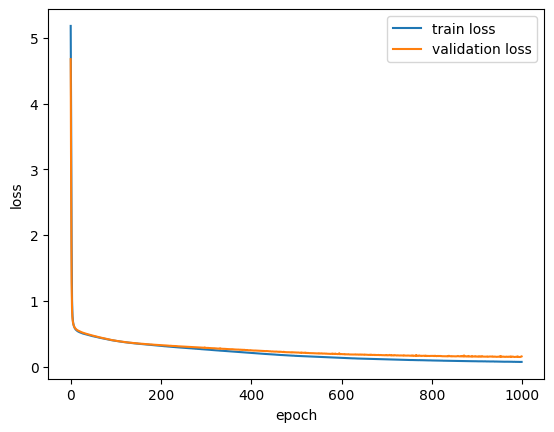

In [531]:
fig, ax = plt.subplots()
plt.plot(alldf["epoch"],alldf["trainloss"], label="train loss")
plt.plot(alldf["epoch"],alldf["valloss"], label="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
ax.legend()
plt.show()

#### point : early stopping is needed in order to avoid overfitting

In [532]:
train_preds = model(train_X.to(device)).to("cpu")

In [533]:
train_preds2 = torch.max(train_preds.data,1)[1]

<a id="accuracy-score"></a>
### 3.11 Accuracy score

#### sklearn has already Accuracy function

In [534]:
print(f"Train sklearn accuracy: {accuracy_score(train_Y,train_preds2)}")

Train sklearn accuracy: 0.9777820525151486


In [535]:
# functionalize accuracy calculation
def calc_accuracy(x,y,model):
    model.to("cpu")
    preds = model(x)
    preds2 = torch.max(preds.data,1)[1]
    model.to(device)
    return accuracy_score(y,preds2)

In [536]:
print(f"Train accuracy: {round(calc_accuracy(train_X,train_Y,model)*100,2)}%")

Train accuracy: 97.78%


In [537]:
print(f"Validation accuracy: {round(calc_accuracy(val_X,val_Y,model)*100,2)}%")

Validation accuracy: 96.46%


<a id="train"></a>
## 4. Train

### Strategy: Save model on best validation score update using calc_accuracy

In [538]:
all_trainloss = []
all_valloss = []

all_trainscore = []
all_valscore = []

allres=[]

bestscore = 0

model=Source_FixedNet() # model instance
model.to(device)
criterion = nn.CrossEntropyLoss() # how to calculate loss function

optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # Algo for optimizing weight

for epoch in tqdm(range(1000)):

    model,trainloss = training(train_dataloader,model)

    preds,valloss = valeval(val_dataloader,model)

    trainscore = calc_accuracy(train_X,train_Y,model)

    valscore = calc_accuracy(val_X,val_Y,model)

    allres.append([epoch,trainloss,valloss,trainscore,valscore])

    if bestscore <valscore:

        bestscore = valscore
        state = {
                    'state_dict': model.feature_extractor.state_dict(),
                    'state_dict_c': model.classifier.state_dict(),
                    'optimizer_dict': optimizer.state_dict(),
                    "bestscore":bestscore
                }


        torch.save(state, "/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D/pretrain/model.pth")

    else:
        pass

True


100%|██████████| 1000/1000 [05:49<00:00,  2.86it/s]


In [539]:
print(f"Best accuracy score: {round(bestscore*100,2)}%")

Best accuracy score: 98.58%


In [540]:
resdf = pd.DataFrame(allres)
resdf.columns=["epoch","trainloss","valloss","trainscore","valscore"]

In [541]:
resdf.head()

,epoch,trainloss,valloss,trainscore,valscore
0,0,1.287892,1.168567,0.764259,0.759231
1,1,1.136463,1.107317,0.860633,0.852692
2,2,1.083321,1.069462,0.936232,0.928846
3,3,1.053012,1.047684,0.940560,0.931923
4,4,1.033294,1.032160,0.947389,0.936923


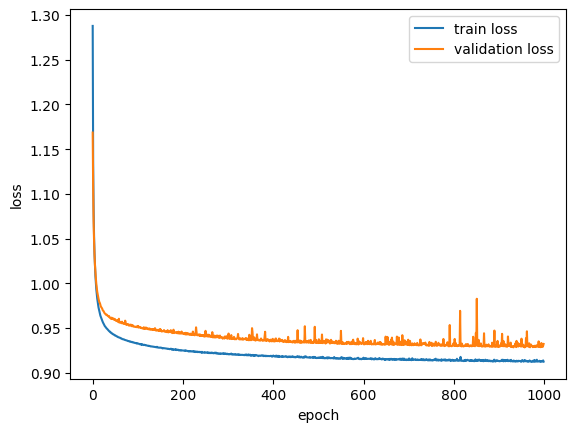

In [542]:
fig, ax = plt.subplots()
plt.plot(resdf["epoch"],resdf["trainloss"], label="train loss")
plt.plot(resdf["epoch"],resdf["valloss"], label="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
ax.legend()
plt.show()

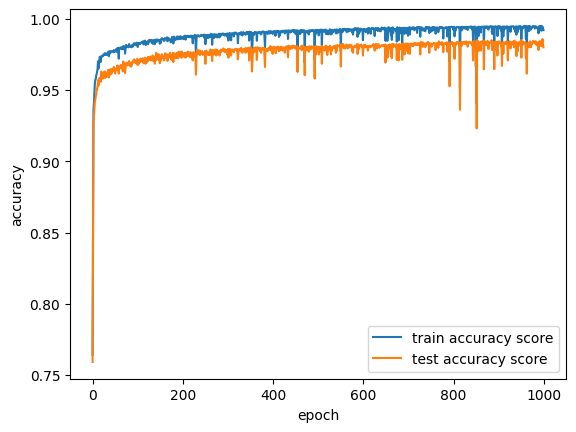

In [543]:
fig, ax = plt.subplots()
plt.plot(resdf["epoch"],resdf["trainscore"], label="train accuracy score")
plt.plot(resdf["epoch"],resdf["valscore"], label="test accuracy score")
plt.xlabel("epoch")
plt.ylabel("accuracy")
ax.legend()
plt.show()

In [546]:
import os
os.chdir('/content/drive/MyDrive/MSDA/A_W_2_D_Open/bvlc_A_W_2_D')

In [547]:
!python train_eval.py

Before:  200 12997 200 9800 150 6850
After:  192 5792 192 3776 128 2848
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
True
Setting up a new session...
Exception in user code:
------------------------------------------------------------
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-pack